## import & load

In [171]:
import pandas as pd
import numpy as np
import sys
import requests
import pprint

from collections import defaultdict
import datetime
import pytz
import importlib
import matplotlib.pyplot as plt

import datetime, json, math
from google.cloud import bigquery
from numpy_ext import rolling_apply as rolling_apply_ext

In [172]:
import os

if os.path.exists('credential.json'):
    os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = os.path.join(os.getcwd(), 'credential.json')

In [173]:
import data.okx.read
importlib.reload(data.okx.read)

<module 'data.okx.read' from '/home/junlim/projects/jitter_recovery/data/okx/read.py'>

In [191]:
#df = data.okx.read.df_okx_20240101_0115.dropna()
#df = data.okx.read.df_okx_20240228_0301.dropna()
df = data.okx.read.df_okx_20240310_0312.dropna()
df_close = df.pivot(index='timestamp', columns='symbol', values='close')
dfi = df.set_index(['timestamp', 'symbol'])
all_symbols = df.symbol.unique()

In [192]:
df.head(2)

,timestamp,symbol,open,high,low,close,volume
0,2024-03-10 05:00:00,GODS-USDT-SWAP,0.440500,0.441500,0.440300,0.44050,3522.0
1,2024-03-10 05:00:00,DGB-USDT-SWAP,0.015546,0.015547,0.015526,0.01554,20200.0


In [193]:
df.tail(2)

,timestamp,symbol,open,high,low,close,volume
572358,2024-03-12 03:58:00,BAL-USDT-SWAP,5.913,5.914,5.906,5.910,272.6
572359,2024-03-12 03:58:00,LQTY-USDT-SWAP,1.770,1.770,1.765,1.768,1276.0


In [194]:
all_symbols = [s for s in all_symbols if s]

In [195]:
len([s for s in all_symbols if 'USDT' in s])

173

## multiple symbols

In [196]:
import algo.jitter_recovery.calculate
importlib.reload(algo.jitter_recovery.calculate)
import algo.collective_jitter_recovery.calculate
importlib.reload(algo.collective_jitter_recovery.calculate)
import algo.jitter_recovery.research
importlib.reload(algo.jitter_recovery.research)
import algo.collective_jitter_recovery.research
importlib.reload(algo.collective_jitter_recovery.research)

<module 'algo.collective_jitter_recovery.research' from '/home/junlim/projects/jitter_recovery/algo/collective_jitter_recovery/research.py'>

In [197]:
# dfst_feature = pd.read_parquet('data/okx/dfst_feature_20240101_0115.parquet')
# dfst_feature = pd.read_parquet('data/okx/dfst_feature_20240116_0131.parquet')
# dfst_feature = pd.read_parquet('data/okx/dfst_feature_20240101_0131.parquet')
# dfst_feature = pd.read_parquet('data/okx/dfst_feature_20240201_0216.parquet')
# dfst_feature = pd.read_parquet('data/okx/dfst_feature_20240216_0229.parquet')
# dfst_feature = pd.read_parquet('data/okx/dfst_feature_20240201_0301.parquet')

In [198]:
#dfst_feature.to_parquet('data/okx/dfst_feature_20240201_0301.parquet')

In [199]:
feature_param = algo.jitter_recovery.calculate_collective.CollectiveRecoveryFeatureParam(40)

In [200]:
dfst_feature = algo.jitter_recovery.research_collective.get_dfst_feature(df, feature_param)

0 symbol: GODS-USDT-SWAP (feature)
1 symbol: DGB-USDT-SWAP (feature)
2 symbol: COMP-USDT-SWAP (feature)
3 symbol: UMA-USDT-SWAP (feature)
4 symbol: IOTA-USDT-SWAP (feature)
5 symbol: WAXP-USDT-SWAP (feature)
6 symbol: STARL-USDT-SWAP (feature)
7 symbol: STRK-USDT-SWAP (feature)
8 symbol: AUCTION-USDT-SWAP (feature)
9 symbol: JUP-USDT-SWAP (feature)
10 symbol: SOL-USDT-SWAP (feature)
11 symbol: STORJ-USDT-SWAP (feature)
12 symbol: USTC-USDT-SWAP (feature)
13 symbol: LOOKS-USDT-SWAP (feature)
14 symbol: MANA-USDT-SWAP (feature)
15 symbol: FLM-USDT-SWAP (feature)
16 symbol: SATS-USDT-SWAP (feature)
17 symbol: ONE-USDT-SWAP (feature)
18 symbol: NFT-USDT-SWAP (feature)
19 symbol: DMAIL-USDT-SWAP (feature)
20 symbol: CEL-USDT-SWAP (feature)
21 symbol: BONK-USDT-SWAP (feature)
22 symbol: RSR-USDT-SWAP (feature)
23 symbol: ZIL-USDT-SWAP (feature)
24 symbol: JOE-USDT-SWAP (feature)
25 symbol: TON-USDT-SWAP (feature)
26 symbol: GAS-USDT-SWAP (feature)
27 symbol: ENJ-USDT-SWAP (feature)
28 symbol

In [201]:
trading_param = algo.jitter_recovery.calculate_collective.CollectiveRecoveryTradingParam(
    feature_param, 
    collective_drop_recovery_trading_param = algo.jitter_recovery.calculate_collective.CollectiveDropRecoveryTradingParam(
        -0.10, -0.30, -0.15, +0.04, -0.02),
    collective_jump_recovery_trading_param = None,
)

In [202]:
import algo.jitter_recovery.calculate
importlib.reload(algo.jitter_recovery.calculate)
import algo.collective_jitter_recovery.calculate
importlib.reload(algo.collective_jitter_recovery.calculate)
import algo.jitter_recovery.research
importlib.reload(algo.jitter_recovery.research)
import algo.collective_jitter_recovery.research
importlib.reload(algo.collective_jitter_recovery.research)

<module 'algo.collective_jitter_recovery.research' from '/home/junlim/projects/jitter_recovery/algo/collective_jitter_recovery/research.py'>

In [71]:
trading_param = algo.collective_jitter_recovery.calculate.CollectiveRecoveryTradingParam(
    feature_param, 
    collective_drop_recovery_trading_param = algo.jitter_recovery.calculate_collective.CollectiveDropRecoveryTradingParam(
        -0.03, -0.30, -0.03, +0.005, -0.01),
    collective_jump_recovery_trading_param = None,
)

In [208]:
trading_param = algo.collective_jitter_recovery.calculate.CollectiveRecoveryTradingParam(
    feature_param, 
    collective_drop_recovery_trading_param = algo.jitter_recovery.calculate_collective.CollectiveDropRecoveryTradingParam(
        -0.03, -0.30, -0.06, +0.03, -0.01),
    collective_jump_recovery_trading_param = None,
)

In [50]:
trading_param = algo.collective_jitter_recovery.calculate.CollectiveRecoveryTradingParam(
    feature_param, 
    collective_drop_recovery_trading_param = None,
    collective_jump_recovery_trading_param = algo.jitter_recovery.calculate_collective.CollectiveJumpRecoveryTradingParam(
        0.03, 0.15, 0.03, -0.005, 0.01),
)

In [203]:
trading_param = algo.collective_jitter_recovery.calculate.CollectiveRecoveryTradingParam(
    feature_param, 
    collective_drop_recovery_trading_param = None,
    collective_jump_recovery_trading_param = algo.jitter_recovery.calculate_collective.CollectiveJumpRecoveryTradingParam(
        0.03, 0.15, 0.06, -0.03, 0.01),
)

In [209]:
dfst_trading = algo.jitter_recovery.research_collective.get_dfst_trading(df, dfst_feature, trading_param)

0 symbol: GODS-USDT-SWAP (31):(trading)
1 symbol: DGB-USDT-SWAP (0):(trading)
2 symbol: COMP-USDT-SWAP (8):(trading)
3 symbol: UMA-USDT-SWAP (0):(trading)
4 symbol: IOTA-USDT-SWAP (7):(trading)
5 symbol: WAXP-USDT-SWAP (0):(trading)
6 symbol: STARL-USDT-SWAP (95):(trading)
7 symbol: STRK-USDT-SWAP (27):(trading)
8 symbol: AUCTION-USDT-SWAP (0):(trading)
9 symbol: JUP-USDT-SWAP (12):(trading)
10 symbol: SOL-USDT-SWAP (0):(trading)
11 symbol: STORJ-USDT-SWAP (27):(trading)
12 symbol: USTC-USDT-SWAP (8):(trading)
13 symbol: LOOKS-USDT-SWAP (5):(trading)
14 symbol: MANA-USDT-SWAP (0):(trading)
15 symbol: FLM-USDT-SWAP (0):(trading)
16 symbol: SATS-USDT-SWAP (26):(trading)
17 symbol: ONE-USDT-SWAP (0):(trading)
18 symbol: NFT-USDT-SWAP (0):(trading)
19 symbol: DMAIL-USDT-SWAP (139):(trading)
20 symbol: CEL-USDT-SWAP (4):(trading)
21 symbol: BONK-USDT-SWAP (12):(trading)
22 symbol: RSR-USDT-SWAP (0):(trading)
23 symbol: ZIL-USDT-SWAP (4):(trading)
24 symbol: JOE-USDT-SWAP (0):(trading)
25 sy

In [210]:
dfst_trading[dfst_trading.profit != 0][['profit']].dropna().groupby('symbol').sum().sort_values('profit')

,profit
symbol,
PEPE-USDT-SWAP,-0.007351
TURBO-USDT-SWAP,-0.004802
STORJ-USDT-SWAP,0.006839
GMT-USDT-SWAP,0.012696
ZETA-USDT-SWAP,0.014332
STARL-USDT-SWAP,0.015154
YGG-USDT-SWAP,0.018645
API3-USDT-SWAP,0.019347
KNC-USDT-SWAP,0.023411


In [212]:
len(dfst_trading[dfst_trading.profit != 0][['profit']].dropna().groupby('symbol').sum().sort_values('profit'))

11

<Axes: xlabel='timestamp'>

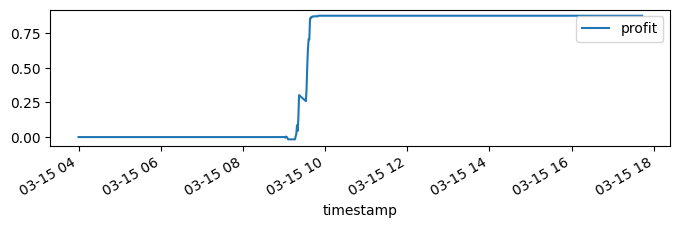

In [189]:
'''
trading_param = algo.jitter_recovery.calculate_collective.CollectiveRecoveryTradingParam(
    feature_param, 
    collective_drop_recovery_trading_param = algo.jitter_recovery.calculate_collective.CollectiveDropRecoveryTradingParam(
        -0.03, -0.30, -0.06, +0.03, -0.01),
    collective_jump_recovery_trading_param = None,
)
'''
dfst_trading[['profit']].groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

<Axes: xlabel='timestamp'>

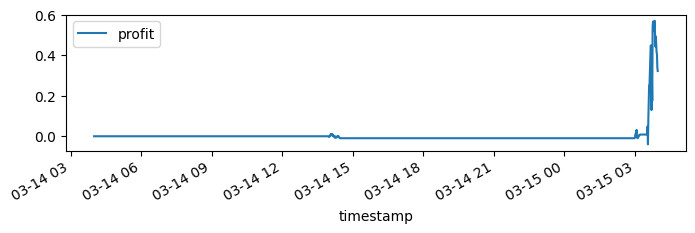

In [154]:
'''
trading_param = algo.jitter_recovery.calculate_collective.CollectiveRecoveryTradingParam(
    feature_param, 
    collective_drop_recovery_trading_param = algo.jitter_recovery.calculate_collective.CollectiveDropRecoveryTradingParam(
        -0.03, -0.30, -0.06, +0.03, -0.01),
    collective_jump_recovery_trading_param = None,
)
'''
dfst_trading[['profit']].groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

<Axes: xlabel='timestamp'>

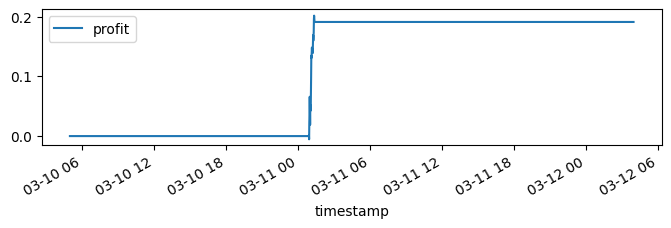

In [211]:
'''
trading_param = algo.jitter_recovery.calculate_collective.CollectiveRecoveryTradingParam(
    feature_param, 
    collective_drop_recovery_trading_param = algo.jitter_recovery.calculate_collective.CollectiveDropRecoveryTradingParam(
        -0.03, -0.30, -0.06, +0.03, -0.01),
    collective_jump_recovery_trading_param = None,
)
'''
dfst_trading[['profit']].groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

<Axes: xlabel='timestamp'>

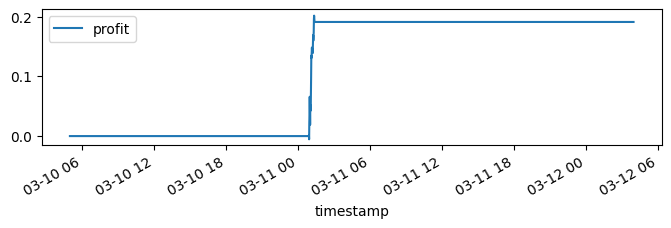

In [104]:
'''
trading_param = algo.jitter_recovery.calculate_collective.CollectiveRecoveryTradingParam(
    feature_param, 
    collective_drop_recovery_trading_param = algo.jitter_recovery.calculate_collective.CollectiveDropRecoveryTradingParam(
        -0.03, -0.30, -0.06, +0.03, -0.01),
    collective_jump_recovery_trading_param = None,
)
'''
dfst_trading[['profit']].groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

<Axes: xlabel='timestamp'>

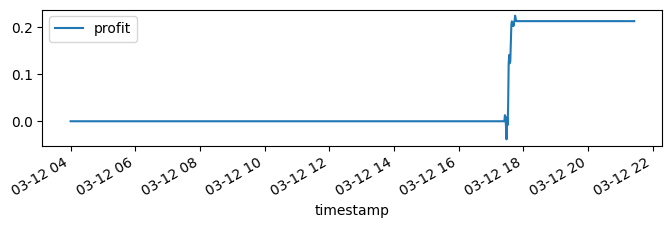

In [90]:
'''
trading_param = algo.jitter_recovery.calculate_collective.CollectiveRecoveryTradingParam(
    feature_param, 
    collective_drop_recovery_trading_param = algo.jitter_recovery.calculate_collective.CollectiveDropRecoveryTradingParam(
        -0.03, -0.30, -0.06, +0.03, -0.01),
    collective_jump_recovery_trading_param = None,
)
'''
dfst_trading[['profit']].groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

<Axes: xlabel='timestamp'>

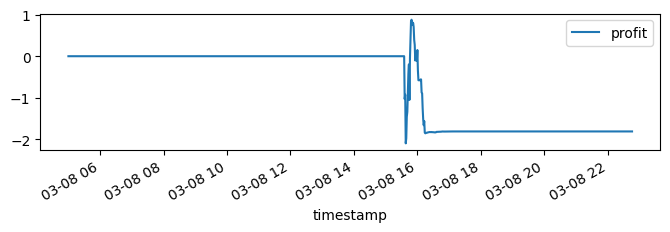

In [74]:
'''
trading_param = algo.jitter_recovery.calculate_collective.CollectiveRecoveryTradingParam(
    feature_param, 
    collective_drop_recovery_trading_param = algo.jitter_recovery.calculate_collective.CollectiveDropRecoveryTradingParam(
        -0.03, -0.30, -0.03, +0.005, -0.01),
    collective_jump_recovery_trading_param = None,
)
'''
dfst_trading[['profit']].groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

<Axes: xlabel='timestamp'>

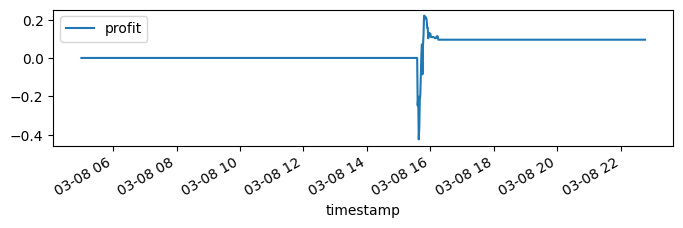

In [70]:
'''
trading_param = algo.jitter_recovery.calculate_collective.CollectiveRecoveryTradingParam(
    feature_param, 
    collective_drop_recovery_trading_param = algo.jitter_recovery.calculate_collective.CollectiveDropRecoveryTradingParam(
        -0.03, -0.30, -0.06, +0.03, -0.01),
    collective_jump_recovery_trading_param = None,
)
'''
dfst_trading[['profit']].groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

<Axes: xlabel='timestamp'>

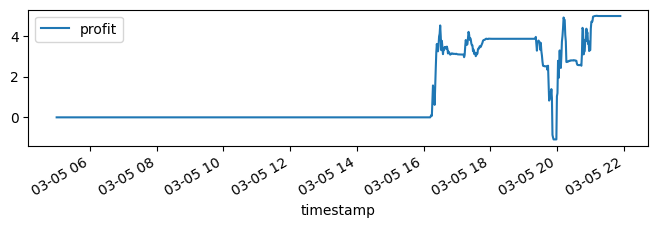

In [114]:
'''
trading_param = algo.jitter_recovery.calculate_collective.CollectiveRecoveryTradingParam(
    feature_param, 
    -0.03, -0.30, -0.03, +0.005, -0.01,
)
'''
dfst_trading[['profit']].groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

<Axes: xlabel='timestamp'>

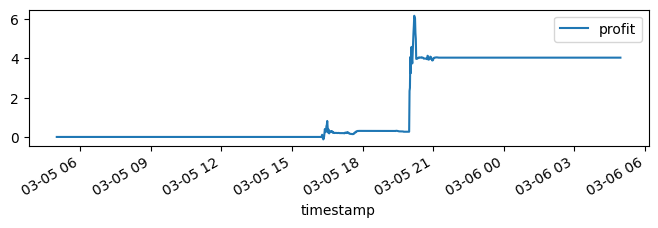

In [132]:
'''
trading_param = algo.jitter_recovery.calculate_collective.CollectiveRecoveryTradingParam(
    feature_param, 
    -0.03, -0.30, -0.06, +0.03, -0.01,
)
'''
dfst_trading[['profit']].groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

<Axes: xlabel='timestamp'>

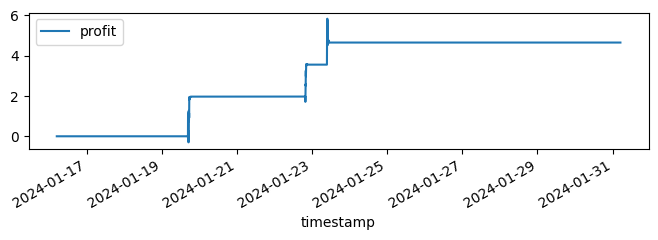

In [18]:
'''
trading_param = algo.jitter_recovery.calculate_collective.CollectiveRecoveryTradingParam(
    feature_param, 
    -0.03, -0.30, -0.03, +0.005, -0.01,
)
'''
dfst_trading[['profit']].groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

<Axes: xlabel='timestamp'>

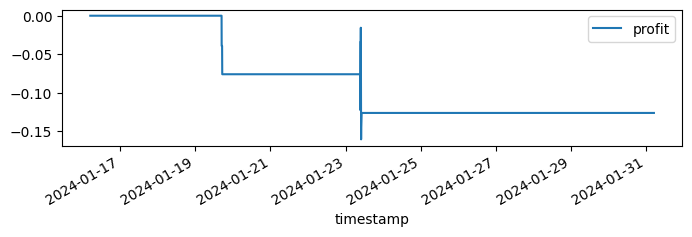

In [33]:
'''
trading_param = algo.jitter_recovery.calculate_collective.CollectiveRecoveryTradingParam(
    feature_param, 
    collective_drop_recovery_trading_param = algo.jitter_recovery.calculate_collective.CollectiveDropRecoveryTradingParam(
        -0.03, -0.30, -0.03, +0.005, -0.01),
    collective_jump_recovery_trading_param = None,
)
'''
dfst_trading[['profit']].groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

<Axes: xlabel='timestamp'>

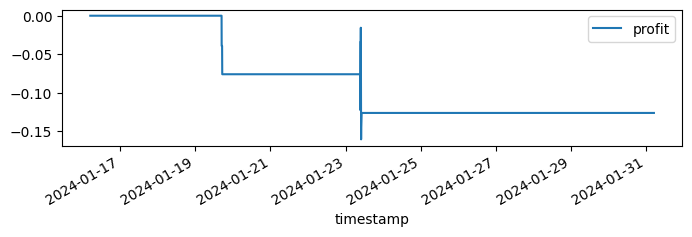

In [29]:
'''
trading_param = algo.jitter_recovery.calculate_collective.CollectiveRecoveryTradingParam(
    feature_param, 
    collective_drop_recovery_trading_param = algo.jitter_recovery.calculate_collective.CollectiveDropRecoveryTradingParam(
        -0.03, -0.30, -0.06, +0.03, -0.01),
    collective_jump_recovery_trading_param = None,
)
'''
dfst_trading[['profit']].groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

<Axes: xlabel='timestamp'>

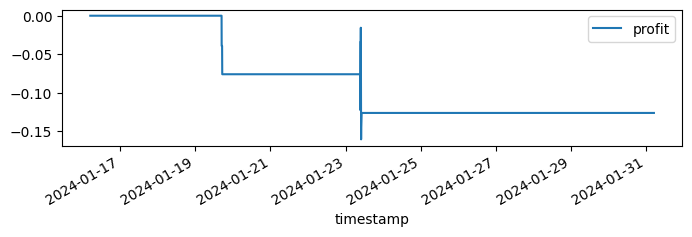

In [16]:
'''
trading_param = algo.jitter_recovery.calculate_collective.CollectiveRecoveryTradingParam(
    feature_param, 
    -0.03, -0.30, -0.06, +0.03, -0.01,
)
'''
dfst_trading[['profit']].groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

<Axes: xlabel='timestamp'>

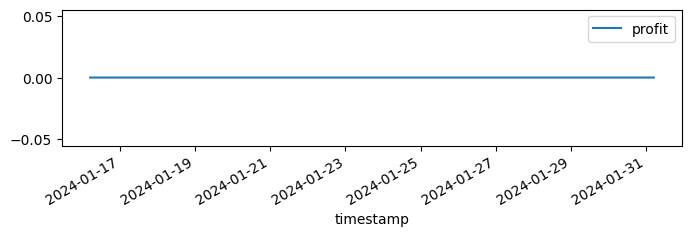

In [37]:
'''
trading_param = algo.jitter_recovery.calculate_collective.CollectiveRecoveryTradingParam(
    feature_param, 
    collective_drop_recovery_trading_param = None,
    collective_jump_recovery_trading_param = algo.jitter_recovery.calculate_collective.CollectiveJumpRecoveryTradingParam(
        0.03, 0.15, 0.06, -0.03, 0.01),
)
'''
dfst_trading[['profit']].groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

<Axes: xlabel='timestamp'>

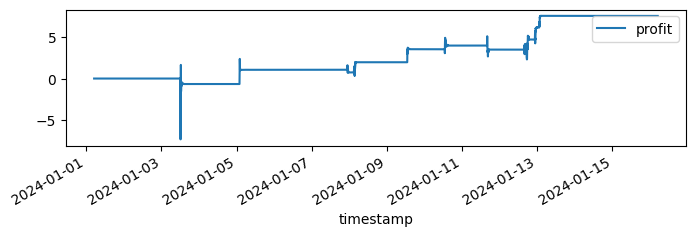

In [328]:
'''
trading_param = algo.jitter_recovery.calculate_collective.CollectiveRecoveryTradingParam(
    feature_param, 
    -0.03, -0.30, -0.03, +0.005, -0.01,
)
'''
dfst_trading[['profit']].groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

<Axes: xlabel='timestamp'>

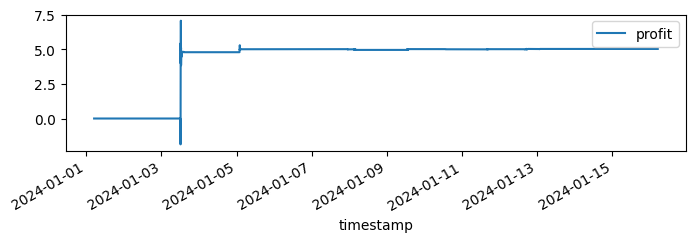

In [324]:
'''
trading_param = algo.jitter_recovery.calculate_collective.CollectiveRecoveryTradingParam(
    feature_param, 
    -0.03, -0.30, -0.06, +0.03, -0.01,
)
'''
dfst_trading[['profit']].groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

<Axes: xlabel='timestamp'>

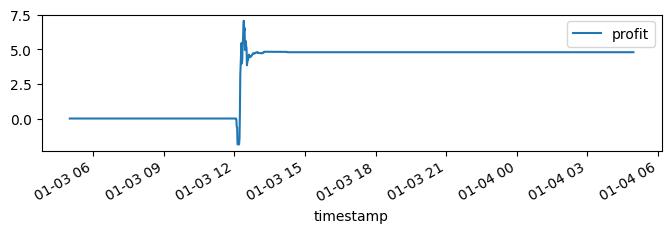

In [149]:
'''
trading_param = algo.jitter_recovery.calculate_collective.CollectiveRecoveryTradingParam(
    feature_param, 
    collective_drop_recovery_trading_param = algo.jitter_recovery.calculate_collective.CollectiveDropRecoveryTradingParam(
        -0.03, -0.30, -0.06, +0.03, -0.01),
    collective_jump_recovery_trading_param = None,
)
'''
dfst_trading[['profit']].groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

<Axes: xlabel='timestamp'>

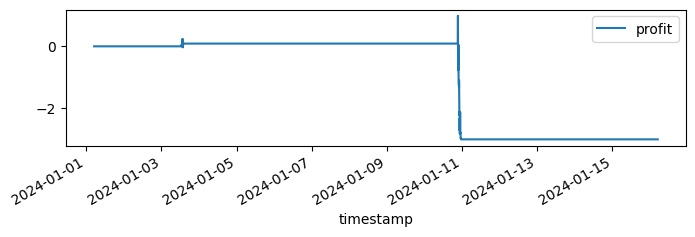

In [53]:
'''
trading_param = algo.jitter_recovery.calculate_collective.CollectiveRecoveryTradingParam(
    feature_param, 
    collective_drop_recovery_trading_param = None,
    collective_jump_recovery_trading_param = algo.jitter_recovery.calculate_collective.CollectiveJumpRecoveryTradingParam(
        0.03, 0.15, 0.03, -0.005, 0.01),
)
'''
dfst_trading[['profit']].groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

<Axes: xlabel='timestamp'>

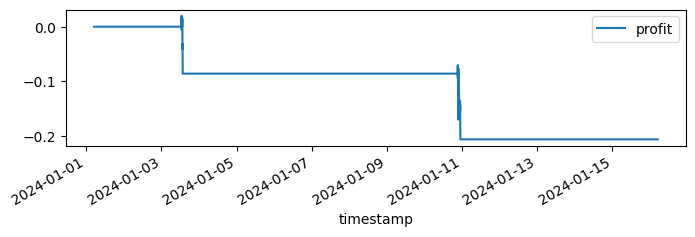

In [49]:
'''
trading_param = algo.jitter_recovery.calculate_collective.CollectiveRecoveryTradingParam(
    feature_param, 
    collective_drop_recovery_trading_param = None,
    collective_jump_recovery_trading_param = algo.jitter_recovery.calculate_collective.CollectiveJumpRecoveryTradingParam(
        0.03, 0.15, 0.06, -0.03, 0.01),
)
'''
dfst_trading[['profit']].groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

<Axes: xlabel='timestamp'>

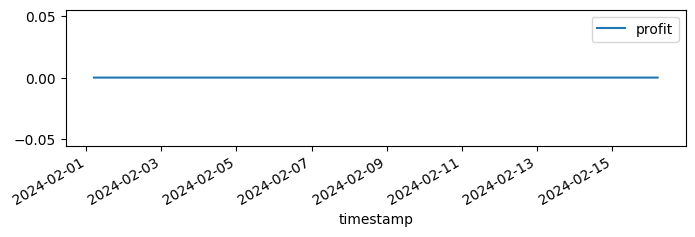

In [270]:
'''
trading_param = algo.jitter_recovery.calculate_collective.CollectiveRecoveryTradingParam(
    feature_param, 
    -0.03, -0.30, -0.03, +0.02, -0.01,
)
'''
dfst_trading[['profit']].groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

<Axes: xlabel='timestamp'>

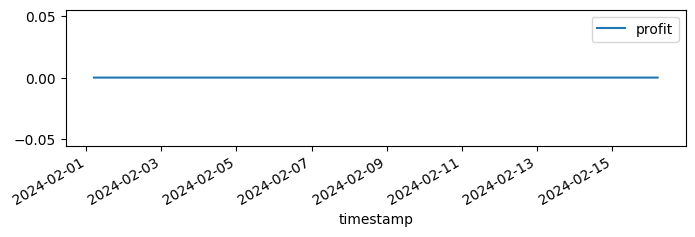

In [267]:
'''
trading_param = algo.jitter_recovery.calculate_collective.CollectiveRecoveryTradingParam(
    feature_param, 
    -0.03, -0.30, -0.06, +0.03, -0.01,
)
'''
dfst_trading[['profit']].groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

<Axes: xlabel='timestamp'>

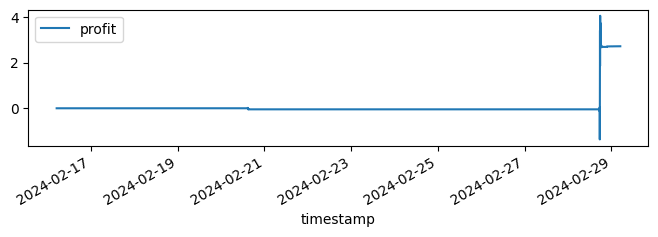

In [287]:
'''
trading_param = algo.jitter_recovery.calculate_collective.CollectiveRecoveryTradingParam(
    feature_param, 
    -0.03, -0.30, -0.03, +0.02, -0.01,
)
'''
dfst_trading[['profit']].groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

<Axes: xlabel='timestamp'>

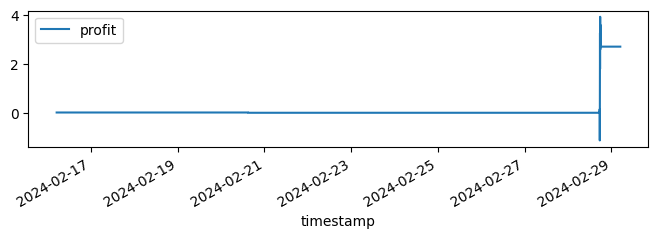

In [256]:
'''
trading_param = algo.jitter_recovery.calculate_collective.CollectiveRecoveryTradingParam(
    feature_param, 
    -0.03, -0.30, -0.06, +0.03, -0.01,
)
'''
dfst_trading[['profit']].groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

<Axes: xlabel='timestamp'>

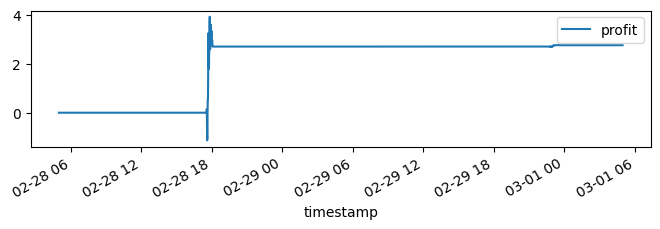

In [300]:
'''
trading_param = algo.jitter_recovery.calculate_collective.CollectiveRecoveryTradingParam(
    feature_param, 
    -0.03, -0.30, -0.06, +0.03, -0.01,
)
'''
dfst_trading[['profit']].groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

<Axes: xlabel='timestamp'>

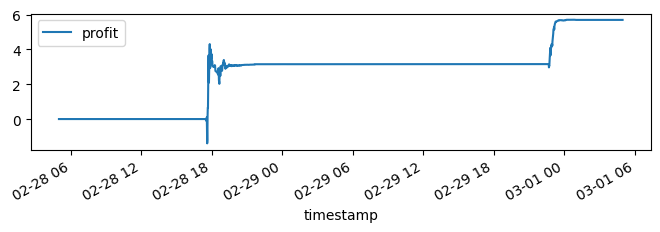

In [303]:
'''
trading_param = algo.jitter_recovery.calculate_collective.CollectiveRecoveryTradingParam(
    feature_param, 
    -0.03, -0.30, -0.03, +0.005, -0.01,
)
'''
dfst_trading[['profit']].groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

In [59]:
dfst_trading[dfst_trading.profit != 0][['profit']].dropna().groupby('symbol').sum().sort_values('profit')

,profit
symbol,
UNI-USDT-SWAP,-0.027251
RACA-USDT-SWAP,-0.007452
CTC-USDT-SWAP,-0.004424
CSPR-USDT-SWAP,-0.004212
LUNA-USDT-SWAP,-0.000880
...,...
LSK-USDT-SWAP,0.060188
WLD-USDT-SWAP,0.068084
BONK-USDT-SWAP,0.086268


<Axes: xlabel='timestamp'>

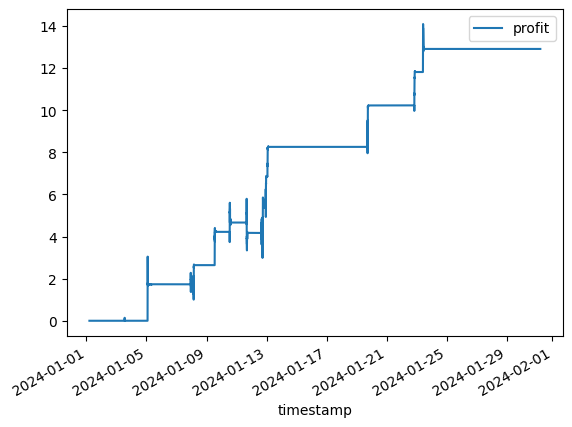

In [23]:
dfst_trading[['profit']].groupby('timestamp').sum().cumsum().plot()

In [138]:
collective_feature_columns_no_rolling = ['ch', 'ch_max', 'ch_min', 'ch_since_max', 'ch_since_min']
df_collective_feature = dfst_feature.dropna().groupby('timestamp')[collective_feature_columns_no_rolling].median().resample('1min').asfreq().ffill()
df_collective_feature['ch_window30_min'] = df_collective_feature.ch.rolling(window=30).min() 
df_collective_feature['ch_window30_max'] = df_collective_feature.ch.rolling(window=30).max() 
df_collective_feature['ch_window60_min'] = df_collective_feature.ch.rolling(window=60).min() 
df_collective_feature['ch_window60_max'] = df_collective_feature.ch.rolling(window=60).max() 

<Axes: xlabel='timestamp'>

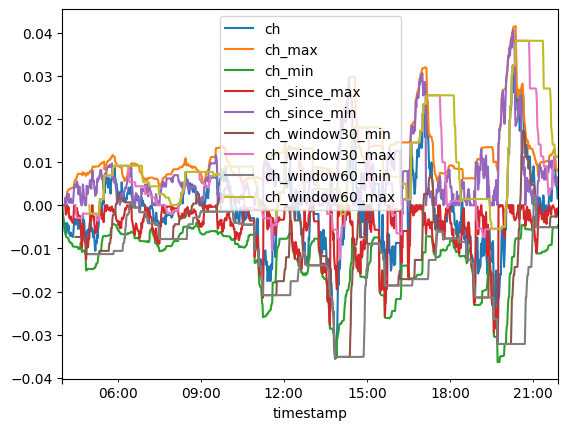

In [139]:
df_collective_feature.plot()

array([[<Axes: title={'center': 'profit'}>]], dtype=object)

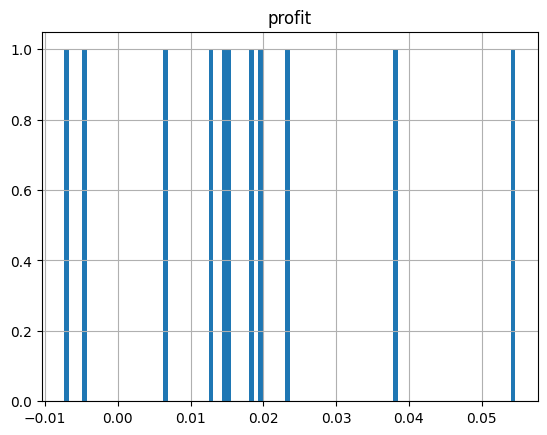

In [105]:
dfst_trading[dfst_trading.profit != 0][['profit']].dropna().groupby('symbol').sum().sort_values('profit').hist(bins=100)

In [615]:
for _, row in dfst_trading[(dfst_trading.position_changed != 0)].dropna().reset_index().sort_values('timestamp').iterrows():
    if 'PERP' not in row['symbol']: continue
    print(f'{row["timestamp"]}, {row["symbol"]}, {row["value"]}, position_changed: {row["position_changed"]}')

2024-01-03 12:13:00, PERP-USDT-SWAP, 1.6581, position_changed: 1.0
2024-01-03 12:16:00, PERP-USDT-SWAP, 1.8838, position_changed: -1.0
2024-01-03 12:17:00, PERP-USDT-SWAP, 1.8575, position_changed: 1.0
2024-01-03 12:18:00, PERP-USDT-SWAP, 1.8033, position_changed: -1.0
2024-01-03 12:19:00, PERP-USDT-SWAP, 1.6796, position_changed: 1.0
2024-01-03 12:23:00, PERP-USDT-SWAP, 1.81, position_changed: -1.0
2024-01-03 12:24:00, PERP-USDT-SWAP, 1.8786, position_changed: 1.0
2024-01-03 12:25:00, PERP-USDT-SWAP, 1.801, position_changed: -1.0
2024-01-03 12:26:00, PERP-USDT-SWAP, 1.8229, position_changed: 1.0
2024-01-03 12:27:00, PERP-USDT-SWAP, 1.7579, position_changed: -1.0
2024-01-03 12:28:00, PERP-USDT-SWAP, 1.81, position_changed: 1.0
2024-01-03 12:29:00, PERP-USDT-SWAP, 1.8183, position_changed: -1.0


In [28]:
dfst_trading[dfst_trading.profit != 0][['profit']].dropna().groupby('symbol').sum().sort_values('profit')

,profit
symbol,
USTC-USDT-SWAP,-0.011166
ICP-USDT-SWAP,-0.010988
SSV-USDT-SWAP,-0.010349
ARB-USDT-SWAP,-0.000929
FET-USDT-SWAP,0.003337
INJ-USDT-SWAP,0.005184
ACE-USDT-SWAP,0.006177
LDO-USDT-SWAP,0.008632
PERP-USDT-SWAP,0.008839


In [41]:
for _, row in dfst_trading[(dfst_trading.position_changed != 0)].dropna().reset_index().sort_values('timestamp').iterrows():
    print(f'{row["timestamp"]}, {row["symbol"]}, {row["value"]}, position_changed: {row["position_changed"]}')

2024-01-03 13:14:00, ACE-USDT-SWAP, 8.439, position_changed: 1.0
2024-01-03 13:14:00, ICP-USDT-SWAP, 14.342, position_changed: 1.0
2024-01-03 13:14:00, LDO-USDT-SWAP, 3.128, position_changed: 1.0
2024-01-03 13:14:00, INJ-USDT-SWAP, 33.573, position_changed: 1.0
2024-01-03 13:14:00, PEOPLE-USDT-SWAP, 0.0178, position_changed: 1.0
2024-01-03 13:14:00, ORDI-USDT-SWAP, 76.4, position_changed: 1.0
2024-01-03 13:14:00, WSM-USDT-SWAP, 0.01654, position_changed: 1.0
2024-01-03 13:14:00, FET-USDT-SWAP, 0.6612, position_changed: 1.0
2024-01-03 13:14:00, SSV-USDT-SWAP, 27.92, position_changed: 1.0
2024-01-03 13:14:00, PERP-USDT-SWAP, 1.8153, position_changed: 1.0
2024-01-03 13:15:00, USTC-USDT-SWAP, 0.02776, position_changed: 1.0
2024-01-03 13:15:00, LDO-USDT-SWAP, 3.155, position_changed: -1.0
2024-01-03 13:15:00, PEOPLE-USDT-SWAP, 0.01848, position_changed: -1.0
2024-01-03 13:15:00, ARB-USDT-SWAP, 1.8717, position_changed: 1.0
2024-01-03 13:19:00, INJ-USDT-SWAP, 33.746, position_changed: -1.0
2

## single symobl

In [91]:
import algo.jitter_recovery.calculate
importlib.reload(algo.jitter_recovery.calculate)
import algo.jitter_recovery.calculate_collective
importlib.reload(algo.jitter_recovery.calculate_collective)
import algo.jitter_recovery.research
importlib.reload(algo.jitter_recovery.research)
import algo.jitter_recovery.research_collective
importlib.reload(algo.jitter_recovery.research_collective)

<module 'algo.jitter_recovery.research_collective' from '/home/junlim/projects/jitter_recovery/algo/jitter_recovery/research_collective.py'>

In [62]:
symbol_investigate = 'SHIB-USDT-SWAP'
dfs = dfi.xs(symbol_investigate, level=1)

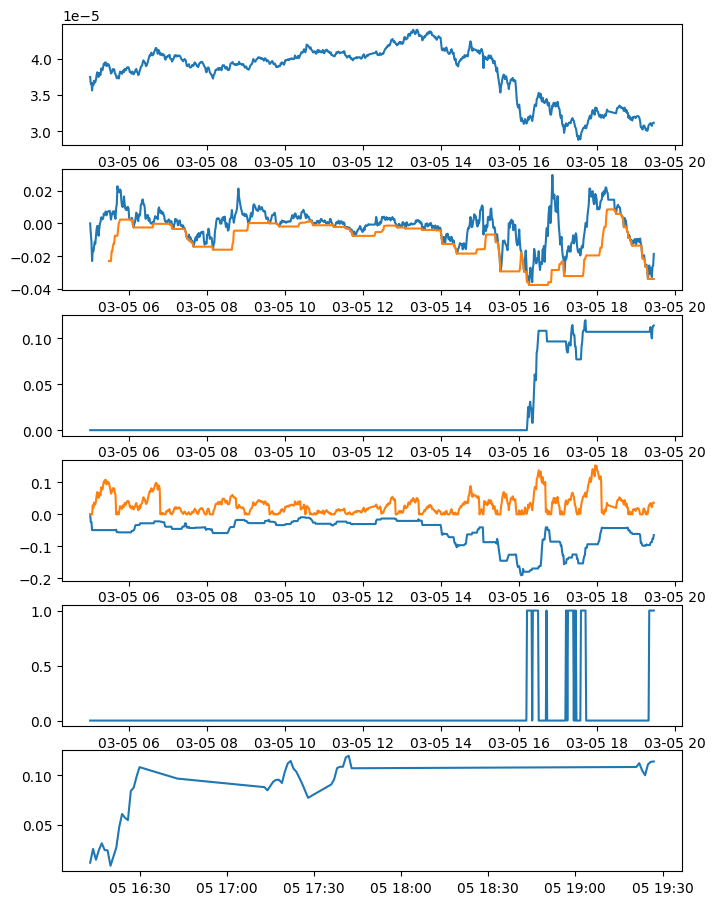

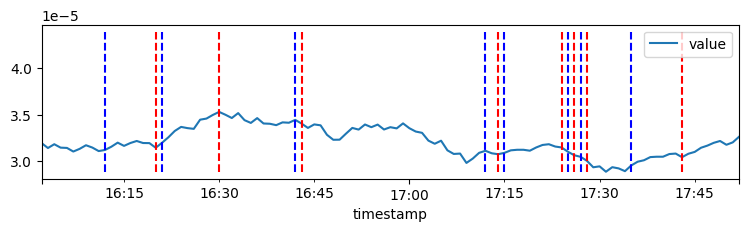

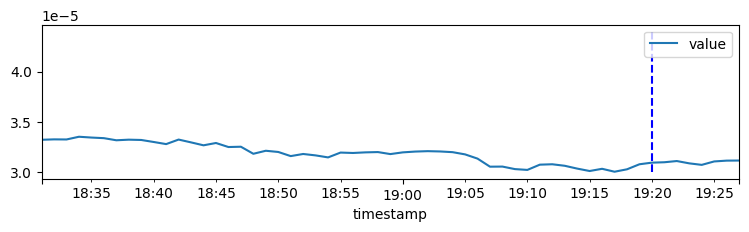

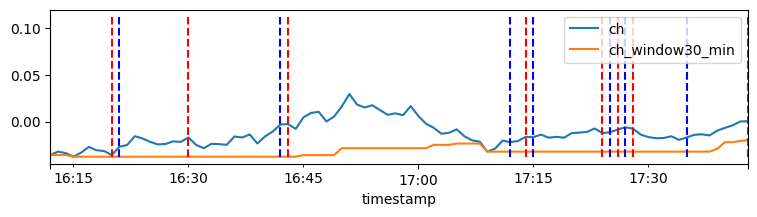

In [63]:
df_feature, df_trading = algo.jitter_recovery.research_collective.investigate_symbol(df, df_collective_feature, symbol_investigate, trading_param, figsize=(8, 11))

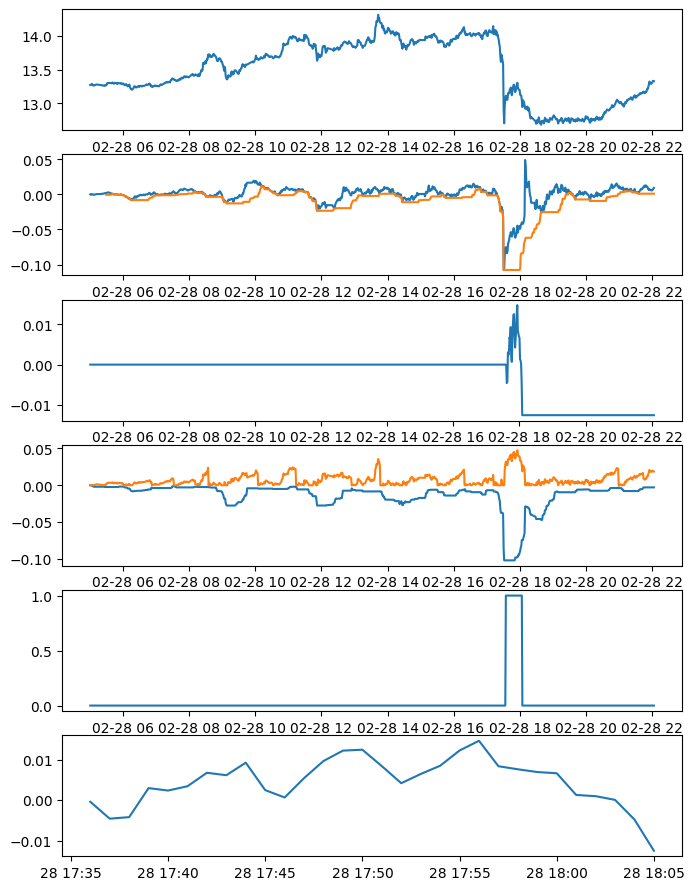

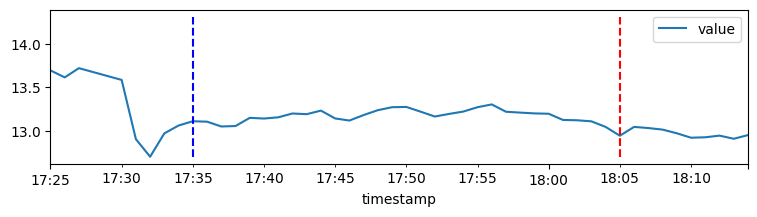

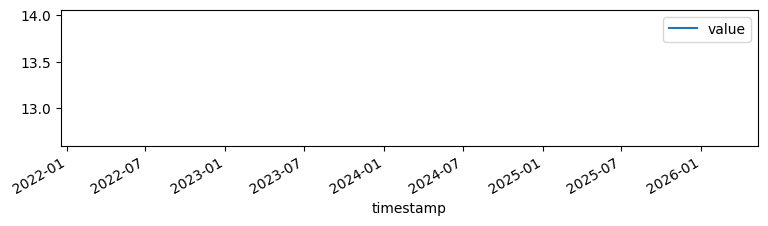

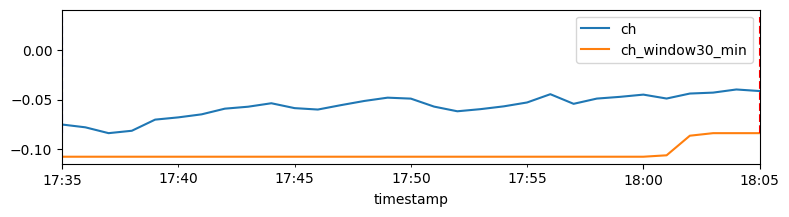

In [184]:
df_feature, df_trading = algo.jitter_recovery.research_collective.investigate_symbol(df, df_collective_feature, symbol_investigate, trading_param, figsize=(8, 11))

In [111]:
df_trading.columns

Index(['avg_v_before_max_ch', 'avg_v_before_min_ch', 'ch', 'ch_max', 'ch_min',
       'ch_since_max', 'ch_since_min', 'distance_max_ch', 'distance_min_ch',
       'v_ch_max_is_from', 'v_ch_max_is_to', 'v_ch_min_is_from',
       'v_ch_min_is_to', 'value', 'in_position', 'value_at_enter',
       'highest_since_enter', 'timedelta_since_position_enter',
       'v_ch_max_is_to_when_enter', 'v_ch_min_is_to_when_enter',
       'v_ch_max_is_from_when_enter', 'v_ch_min_is_from_when_enter',
       'ch_from_enter', 'ch_from_highest_since_enter', 'ch_collective',
       'ch_max_collective', 'ch_min_collective', 'ch_since_max_collective',
       'ch_since_min_collective', 'ch_window30_min_collective',
       'position_changed', 'profit_raw', 'profit'],
      dtype='object')

<Axes: xlabel='timestamp'>

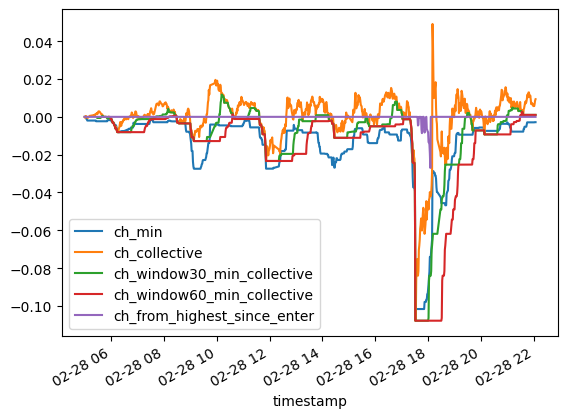

In [167]:
df_trading[['ch_min', 'ch_collective', 'ch_window30_min_collective', 'ch_window60_min_collective', 'ch_from_highest_since_enter']].plot()

In [577]:
df_trading[(df_trading.position_changed != 0)][['value', 'in_position', 'position_changed', 'profit_raw', 'profit']].dropna()

,value,in_position,position_changed,profit_raw,profit
timestamp,,,,,
2024-01-03 12:13:00,0.000265,1,1.0,0.000000,0.000000
2024-01-03 12:16:00,0.000258,0,-1.0,-0.000014,-0.052225
2024-01-03 12:17:00,0.000275,1,1.0,0.000000,0.000000
2024-01-03 12:19:00,0.000269,0,-1.0,-0.000015,-0.053502
2024-01-03 12:20:00,0.000279,1,1.0,0.000000,0.000000
2024-01-03 12:26:00,0.000283,0,-1.0,0.000008,0.029080
2024-01-03 12:27:00,0.000278,1,1.0,-0.000000,-0.000000
2024-01-03 12:32:00,0.000286,0,-1.0,-0.000004,-0.012440


In [578]:
for _, row in dfst_trading[(dfst_trading.position_changed != 0)].dropna().reset_index().sort_values('timestamp').iterrows():
    if row['symbol'] != symbol_investigate: continue
    print(f'{row["timestamp"]}, {row["symbol"]}, {row["value"]}, position_changed: {row["position_changed"]}')

2024-01-03 12:13:00, TURBO-USDT-SWAP, 0.0002649, position_changed: 1.0
2024-01-03 12:16:00, TURBO-USDT-SWAP, 0.0002577, position_changed: -1.0
2024-01-03 12:17:00, TURBO-USDT-SWAP, 0.0002746, position_changed: 1.0
2024-01-03 12:19:00, TURBO-USDT-SWAP, 0.0002689, position_changed: -1.0
2024-01-03 12:20:00, TURBO-USDT-SWAP, 0.0002791, position_changed: 1.0
2024-01-03 12:26:00, TURBO-USDT-SWAP, 0.0002831, position_changed: -1.0
2024-01-03 12:27:00, TURBO-USDT-SWAP, 0.0002781, position_changed: 1.0
2024-01-03 12:32:00, TURBO-USDT-SWAP, 0.0002858, position_changed: -1.0
